<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression using `nn.parameters`

In [141]:
# Importing PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Creating weight and bias
weight = 0.2
bias = 0.8

# Creating data
start, end, step = 0, 1, 0.001
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Splitting data
split = int(0.8 * len(X))

# Splitting training and test data in 80:20 ratio
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [142]:
# Creating plt to visualize
def plot_data(train_data = X_train,
             train_labels = y_train,
             test_data = X_test,
             test_labels = y_test,
             preds = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Testing Data")

  if preds is not None:
    plt.scatter(test_data, preds, c = 'r', s = 4, label = "Predictions")

  plt.legend(prop={'size': 14})

In [173]:
# Creating Linear regression model
class LinearRegressionModel_V0(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [202]:
# Creating an instance of linear regression model with manual seed as 36
torch.manual_seed(36)
model_0 = LinearRegressionModel_V0()
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.4704], requires_grad=True),
  Parameter containing:
  tensor([-0.0512], requires_grad=True)],
 OrderedDict([('weight', tensor([0.4704])), ('bias', tensor([-0.0512]))]))

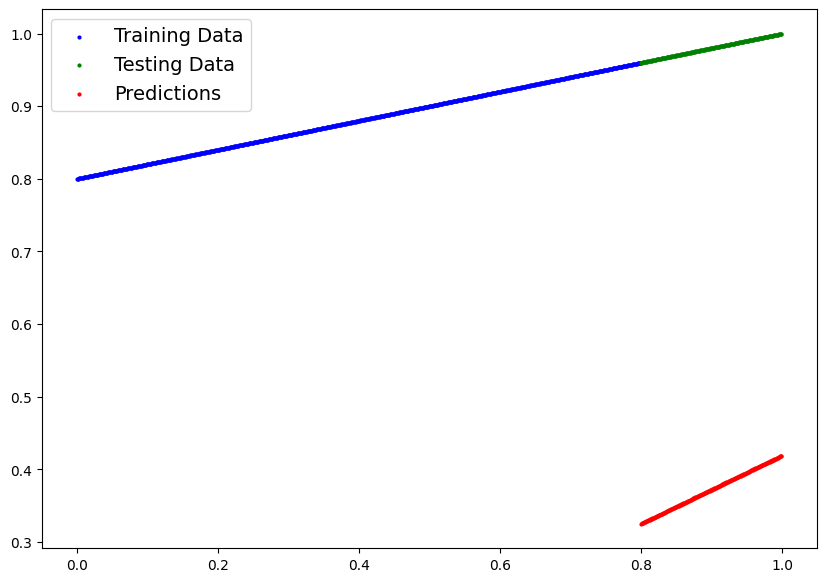

In [203]:
# Ploting graph before training
model_0.eval()
with torch.inference_mode():
  before_pred = model_0(X_test)

plot_data(preds=before_pred)

In [204]:
# Create loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.0005)

In [205]:
# Training and testing loop with epochs as 1000

epochs = 10000

for epoch in range(epochs):
  # Training
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradient for optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimize step
  optimizer.step()

  # Testing
  if epoch % 10 == 0:
    model_0.eval()

    with torch.inference_mode():
      test_pred = model_0(X_test)

      test_loss = loss_fn(test_pred, y_test)

  if epoch % 500 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss} | Testing Loss: {test_loss}")

model_0.state_dict()

Epoch: 0 | Training Loss: 0.7432224154472351 | Testing Loss: 0.6073444485664368
Epoch: 500 | Training Loss: 0.45332610607147217 | Testing Loss: 0.26751431822776794
Epoch: 1000 | Training Loss: 0.16630637645721436 | Testing Loss: 0.07027120888233185
Epoch: 1500 | Training Loss: 0.10092159360647202 | Testing Loss: 0.19419297575950623
Epoch: 2000 | Training Loss: 0.09004263579845428 | Testing Loss: 0.20335239171981812
Epoch: 2500 | Training Loss: 0.081402987241745 | Testing Loss: 0.18932397663593292
Epoch: 3000 | Training Loss: 0.07286158204078674 | Testing Loss: 0.17044027149677277
Epoch: 3500 | Training Loss: 0.06432399153709412 | Testing Loss: 0.1504642367362976
Epoch: 4000 | Training Loss: 0.05578630417585373 | Testing Loss: 0.1304876059293747
Epoch: 4500 | Training Loss: 0.04724854975938797 | Testing Loss: 0.11051204055547714
Epoch: 5000 | Training Loss: 0.03871079534292221 | Testing Loss: 0.09053479880094528
Epoch: 5500 | Training Loss: 0.03017304465174675 | Testing Loss: 0.07055839

OrderedDict([('weight', tensor([0.2003])), ('bias', tensor([0.8004]))])

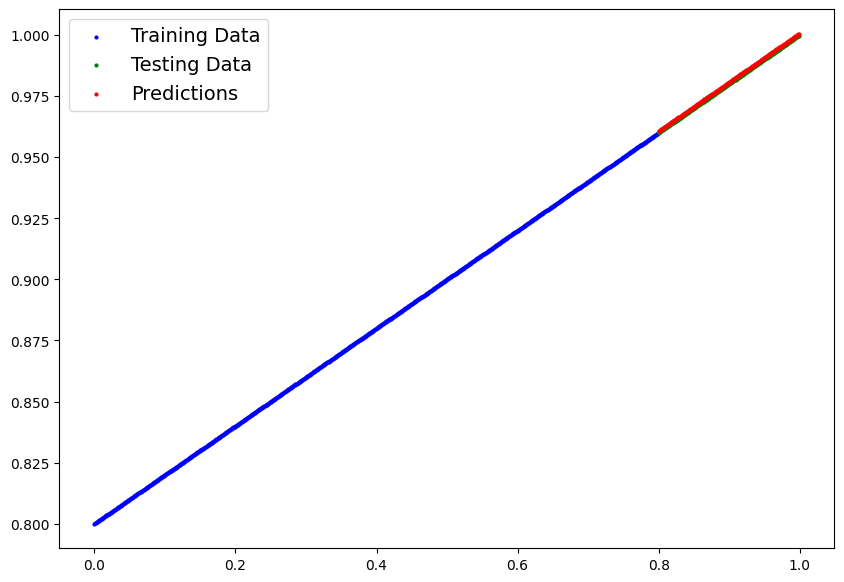

In [206]:
# Test and plot trained model
model_0.eval()
with torch.inference_mode():
  after_pred = model_0(X_test)

plot_data(preds = after_pred)

# 2. Linear Regression model using `nn.Linear()`

In [229]:
# Importing PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# weight and bias
weight = 0.5
bias = 0.7

# start, end and step
start, end, step = 0, 1, 0.002
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# splitting data
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

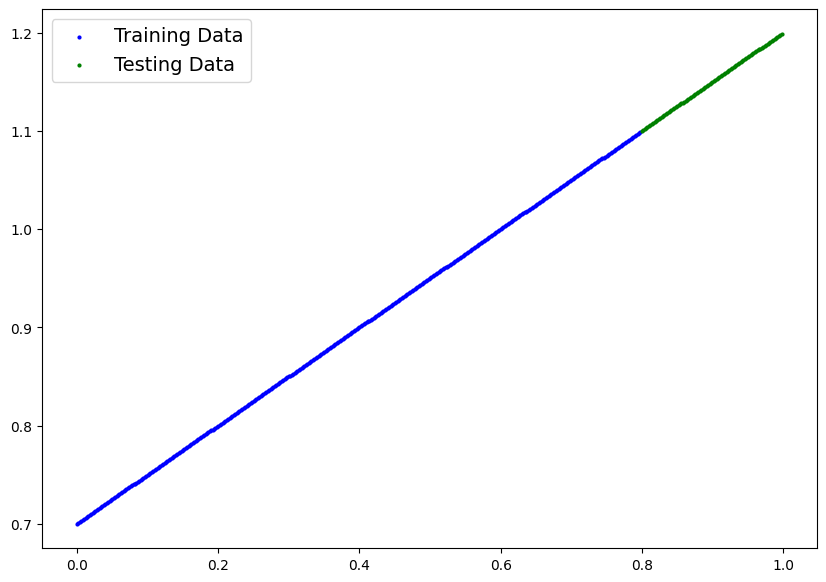

In [230]:
def plt_data1(train_data = X_train,
             train_labels = y_train,
             test_data = X_test,
             test_labels = y_test,
             pred_labels = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing Data')

  if pred_labels is not None:
    plt.scatter(test_data, pred_labels, c = 'r', s = 4, label = 'Predected Data')

  plt.legend(prop={'size': 14})

plt_data1()

In [236]:
# Create model using nn.Linear
class LinearRegressionModel_V1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


# Create model instance
torch.manual_seed(42)
model_1 = LinearRegressionModel_V1()
list(model_1.parameters()), model_1.state_dict()

([Parameter containing:
  tensor([[0.7645]], requires_grad=True),
  Parameter containing:
  tensor([0.8300], requires_grad=True)],
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

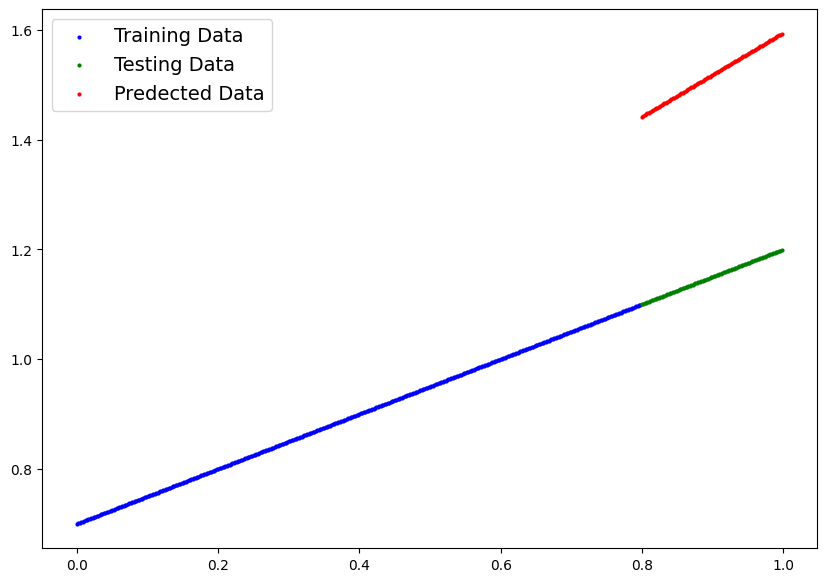

In [237]:
model_1.eval()
with torch.inference_mode():
  before_train = model_1(X_test)

plt_data1(pred_labels=before_train)

In [238]:
# Creating loss function and optimizer
loss_fn1 = nn.L1Loss()

optimizer1 = torch.optim.SGD(params = model_1.parameters(),
                             lr = 0.0025)

In [239]:
# Training loop
epochs = 5000

for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  train_loss = loss_fn1(y_train, y_pred)

  # 3. optimizer zero grad
  optimizer1.zero_grad()

  # 4. Backward pass
  train_loss.backward()

  # 5. optimize step
  optimizer1.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn1(y_test, test_pred)

  if epoch % 250 == 0:
    print(f"Epoch: {epoch} | Training loss: {train_loss} | Testing loss: {test_loss}")

model_1.state_dict()

Epoch: 0 | Training loss: 0.23555880784988403 | Testing loss: 0.36443135142326355
Epoch: 250 | Training loss: 0.020831888541579247 | Testing loss: 0.04860129952430725
Epoch: 500 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 750 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 1000 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 1250 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 1500 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 1750 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 2000 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 2250 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 2500 | Training loss: 0.0008684499771334231 | Testing loss: 0.001930812606588006
Epoch: 2750 | Training loss: 0.000868449977

OrderedDict([('linear_layer.weight', tensor([[0.5012]])),
             ('linear_layer.bias', tensor([0.7004]))])

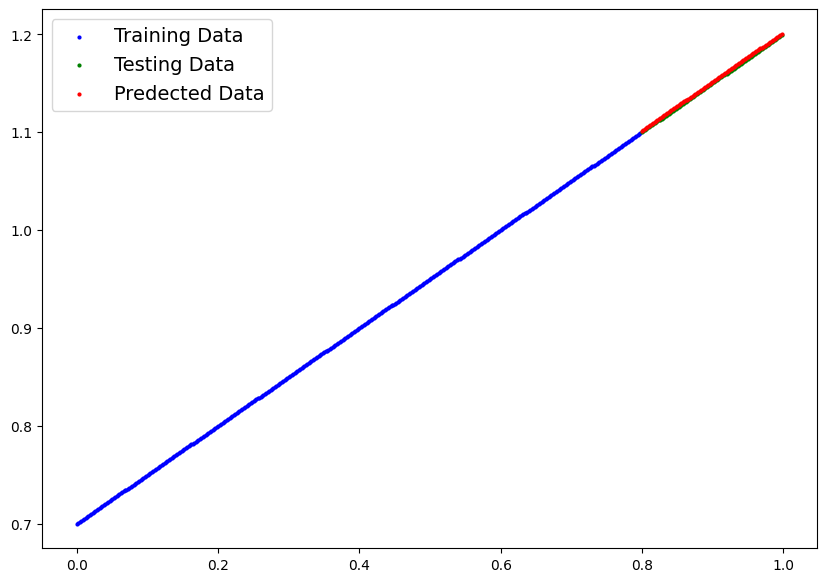

In [240]:
model_1.eval()
with torch.inference_mode():
  after_preds = model_1(X_test)

plt_data1(pred_labels=after_preds)